In [62]:
import matplotlib.pyplot as plt

In [63]:
import numpy as np
from PIL import Image
# opening image
img = Image.open('s.jpg')
arr = np.array(img,dtype=np.uint8)

In [64]:
arr.shape

(224, 300, 3)

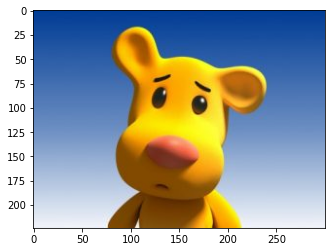

In [65]:
plt.imshow(arr)

# Converting rgb to grayscale

In [66]:
grayscale=np.ones((224,300),dtype=np.uint8)

In [67]:
# averaging rgb to achieve grayscale
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        tmp=(float(arr[i][j][0])+float(arr[i][j][1])+float(arr[i][j][2]))/3
        grayscale[i][j]=int(tmp)

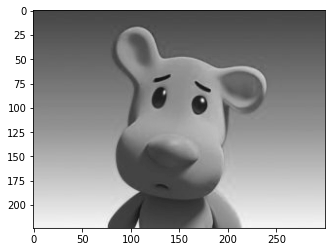

In [68]:
plt.imshow(grayscale,cmap="gray",vmin=0,vmax=255)

In [69]:
# saving the grayscale image
grayscale_img=Image.fromarray(grayscale)
grayscale_img.save("grayscale.png")

# Dithering:

In [70]:
ordered_img=np.copy(grayscale)

In [71]:
# dithering matrix from the slides
dithering_matrix=np.array([[0,8,2,10],
                           [12,4,14,6],
                           [3,11,1,9],
                           [15,7,13,5]],dtype=np.float64)
dithering_matrix/=16
dithering_matrix

array([[0.    , 0.5   , 0.125 , 0.625 ],
       [0.75  , 0.25  , 0.875 , 0.375 ],
       [0.1875, 0.6875, 0.0625, 0.5625],
       [0.9375, 0.4375, 0.8125, 0.3125]])

In [72]:
# black or white thresholding
for i in range(0,grayscale.shape[0],4):
    for j in range(0,grayscale.shape[1],4):
        for tmp_row in range(4):
            for tmp_column in range(4):
                black_or_white=int((grayscale[i+tmp_row][j+tmp_column]/255.0)>dithering_matrix[tmp_row][tmp_column])
                ordered_img[i+tmp_row][j+tmp_column]=black_or_white*255

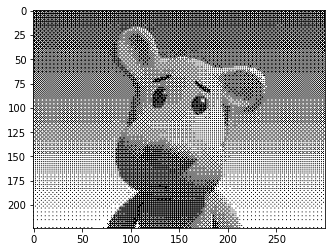

In [73]:
plt.imshow(ordered_img,cmap="gray",vmin=0,vmax=255)

In [75]:
# checking correctness:
for i in range(ordered_img.shape[0]):
    for j in range(ordered_img.shape[1]):
        if ordered_img[i][j]!=0 and ordered_img[i][j]!=255:
            print("error")

In [76]:
# saving the dithered pic:
ordered_pic=Image.fromarray(ordered_img)
ordered_pic.save("o_dithered.png")